In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install('metap')


Bioconductor version '3.16' is out-of-date; the current release version '3.17'
  is available with R version '4.3'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Installing package(s) 'metap'

also installing the dependency ‘qqconf’


Warning message in install.packages(...):
“installation of package ‘qqconf’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘metap’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'curl', 'dbplyr', 'harmony', 'lattice', 'lubridate', 'Matrix',
  'polyclip', 'RcppArmadillo', 'sp', 'spatstat.random', 'vroom'



In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [44]:
install.packages("writexl")
library("writexl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [23]:
readRDS(file="/data2/ZenNa/mice_count_data/Result/cluster_micedata_final.rds")

An object of class Seurat 
19648 features across 25063 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

In [24]:
mice_clustered_data <- readRDS(file="/data2/ZenNa/mice_count_data/Result/cluster_micedata_final.rds")

In [25]:
ls()

[1] "mice_clustered_data"

In [26]:
head(mice_clustered_data )

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,integrated_snn_res.0.2,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>
C1_1,GSM5661621_D-1.counts.tsv,4455,1189,0.31425365,D-1.counts.tsv,2,2
C2_1,GSM5661621_D-1.counts.tsv,3063,843,0.09794319,D-1.counts.tsv,2,2
C4_1,GSM5661621_D-1.counts.tsv,1931,603,0.15535992,D-1.counts.tsv,0,0
C5_1,GSM5661621_D-1.counts.tsv,4328,1380,2.88817006,D-1.counts.tsv,1,1
C6_1,GSM5661621_D-1.counts.tsv,6439,1905,1.56856655,D-1.counts.tsv,4,4
C8_1,GSM5661621_D-1.counts.tsv,9116,2057,1.83194384,D-1.counts.tsv,1,1
C9_1,GSM5661621_D-1.counts.tsv,2521,735,0.27766759,D-1.counts.tsv,0,0
Ca_1,GSM5661621_D-1.counts.tsv,2150,643,0.32558140,D-1.counts.tsv,0,0
Cb_1,GSM5661621_D-1.counts.tsv,3469,1087,0.08648025,D-1.counts.tsv,0,0


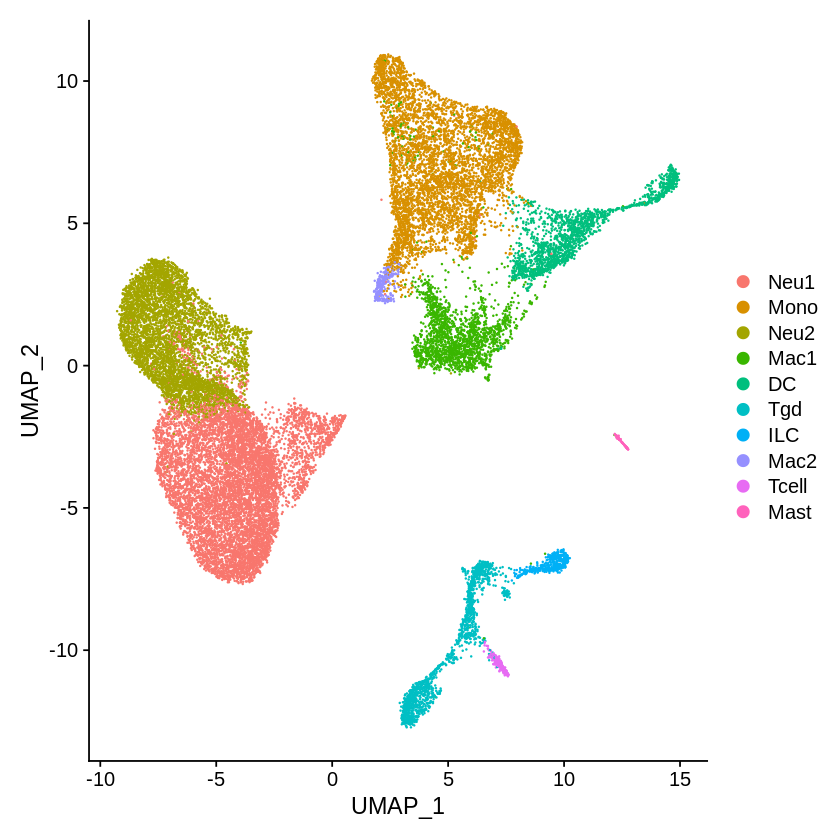

In [27]:
DimPlot(mice_clustered_data )

In [28]:
DefaultAssay(mice_clustered_data )


[1] "integrated"

In [29]:
DefaultAssay(mice_clustered_data) <- "RNA"

In [31]:
mice_clustered_data$celltypes <- Idents(mice_clustered_data)


In [32]:
head(mice_clustered_data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,integrated_snn_res.0.2,seurat_clusters,celltypes
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>,<fct>
C1_1,GSM5661621_D-1.counts.tsv,4455,1189,0.31425365,D-1.counts.tsv,2,2,Neu2
C2_1,GSM5661621_D-1.counts.tsv,3063,843,0.09794319,D-1.counts.tsv,2,2,Neu2
C4_1,GSM5661621_D-1.counts.tsv,1931,603,0.15535992,D-1.counts.tsv,0,0,Neu1
C5_1,GSM5661621_D-1.counts.tsv,4328,1380,2.88817006,D-1.counts.tsv,1,1,Mono
C6_1,GSM5661621_D-1.counts.tsv,6439,1905,1.56856655,D-1.counts.tsv,4,4,DC
C8_1,GSM5661621_D-1.counts.tsv,9116,2057,1.83194384,D-1.counts.tsv,1,1,Mono
C9_1,GSM5661621_D-1.counts.tsv,2521,735,0.27766759,D-1.counts.tsv,0,0,Neu1
Ca_1,GSM5661621_D-1.counts.tsv,2150,643,0.32558140,D-1.counts.tsv,0,0,Neu1
Cb_1,GSM5661621_D-1.counts.tsv,3469,1087,0.08648025,D-1.counts.tsv,0,0,Neu1


In [33]:
mice_clustered_data$group <- gsub("\\.counts\\.tsv", "", mice_clustered_data$sample)

In [34]:
head(mice_clustered_data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,integrated_snn_res.0.2,seurat_clusters,celltypes,group
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>,<fct>,<chr>
C1_1,GSM5661621_D-1.counts.tsv,4455,1189,0.31425365,D-1.counts.tsv,2,2,Neu2,D-1
C2_1,GSM5661621_D-1.counts.tsv,3063,843,0.09794319,D-1.counts.tsv,2,2,Neu2,D-1
C4_1,GSM5661621_D-1.counts.tsv,1931,603,0.15535992,D-1.counts.tsv,0,0,Neu1,D-1
C5_1,GSM5661621_D-1.counts.tsv,4328,1380,2.88817006,D-1.counts.tsv,1,1,Mono,D-1
C6_1,GSM5661621_D-1.counts.tsv,6439,1905,1.56856655,D-1.counts.tsv,4,4,DC,D-1
C8_1,GSM5661621_D-1.counts.tsv,9116,2057,1.83194384,D-1.counts.tsv,1,1,Mono,D-1
C9_1,GSM5661621_D-1.counts.tsv,2521,735,0.27766759,D-1.counts.tsv,0,0,Neu1,D-1
Ca_1,GSM5661621_D-1.counts.tsv,2150,643,0.32558140,D-1.counts.tsv,0,0,Neu1,D-1
Cb_1,GSM5661621_D-1.counts.tsv,3469,1087,0.08648025,D-1.counts.tsv,0,0,Neu1,D-1


In [35]:
mice_clustered_data$WT_Diabetic <- paste(mice_clustered_data$group, Idents(mice_clustered_data))

In [36]:
Idents(mice_clustered_data) <- "WT_Diabetic"

In [37]:
Idents(mice_clustered_data)

C1_1      C2_1      C4_1      C5_1      C6_1      C8_1      C9_1      Ca_1 
 D-1 Neu2  D-1 Neu2  D-1 Neu1  D-1 Mono    D-1 DC  D-1 Mono  D-1 Neu1  D-1 Neu1 
     Cb_1      Cc_1      Cd_1      Ce_1      Cf_1     C11_1     C12_1     C13_1 
 D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Neu2  D-1 Neu2  D-1 Neu1  D-1 Neu2  D-1 Mono 
    C15_1     C17_1     C18_1     C1a_1     C1d_1     C21_1     C22_1     C24_1 
 D-1 Neu1  D-1 Neu1  D-1 Neu1  D-1 Mac1  D-1 Mono  D-1 Mono  D-1 Neu1  D-1 Neu2 
    C26_1     C27_1     C2a_1     C2b_1     C2c_1     C2d_1     C2f_1     C30_1 
 D-1 Mono  D-1 Neu2  D-1 Neu1  D-1 Neu2  D-1 Mono  D-1 Mono  D-1 Mac1  D-1 Neu1 
    C31_1     C32_1     C34_1     C35_1     C36_1     C37_1     C38_1     C3a_1 
 D-1 Mac1  D-1 Neu2  D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Neu1 
    C3b_1     C3c_1     C3d_1     C3e_1     C3f_1     C40_1     C43_1     C44_1 
 D-1 Neu1  D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Neu1  D-1 Neu2 
    C45_1     C47_1     C48_1     C49_1     C4a_1     C4b_1     C4c_1     C4d_1 
 D-1 Neu2  D-1 Mono  D-1 Neu2  D-1 Mono  D-1 Neu1  D-1 Mono  D-1 Mac1  D-1 Neu2 
    C4f_1     C50_1     C51_1     C52_1     C53_1     C54_1     C57_1     C58_1 
 D-1 Neu1  D-1 Neu1    D-1 DC  D-1 Mono  D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Mono 
    C59_1     C5a_1     C5b_1     C5e_1     C5f_1     C60_1     C61_1     C63_1 
 D-1 Mac1  D-1 Mono  D-1 Mono    D-1 DC  D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Mono 
    C65_1     C66_1     C67_1     C69_1     C6b_1     C6c_1     C6d_1     C6e_1 
 D-1 Neu2  D-1 Neu1  D-1 Mono  D-1 Mono  D-1 Neu1  D-1 Mono  D-1 Neu2  D-1 Neu2 
    C6f_1     C71_1     C72_1     C74_1     C75_1     C76_1     C78_1     C79_1 
 D-1 Neu2   D-1 ILC  D-1 Mono  D-1 Neu2  D-1 Mono  D-1 Mono  D-1 Neu1  D-1 Neu1 
    C7a_1     C7b_1     C7e_1     C81_1     C83_1     C84_1     C85_1     C86_1 
 D-1 Mono  D-1 Mono  D-1 Mono  D-1 Neu1  D-1 Mac1  D-1 Neu1  D-1 Neu2  D-1 Neu1 
    C87_1     C88_1     C8a_1     C8b_1     C8c_1     C8d_1     C8e_1     C8f_1 
 D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Mono  D-1 Neu2  D-1 Neu1  D-1 Neu1  D-1 Mono 
    C90_1     C91_1     C92_1     C93_1     C94_1     C95_1     C96_1     C97_1 
 D-1 Neu2  D-1 Neu1  D-1 Mono    D-1 DC  D-1 Neu2  D-1 Neu2  D-1 Mono  D-1 Neu1 
    C98_1     C99_1     C9a_1     C9b_1     C9c_1     C9d_1     C9e_1     C9f_1 
 D-1 Mono  D-1 Neu2  D-1 Mac1  D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Neu1  D-1 Neu2 
    Ca0_1     Ca1_1     Ca4_1     Ca5_1     Ca6_1     Ca7_1     Ca8_1     Ca9_1 
 D-1 Neu1  D-1 Neu1  D-1 Neu1  D-1 Mac1  D-1 Neu1  D-1 Mac1  D-1 Mono  D-1 Mac1 
    Caa_1     Cac_1     Cad_1     Cae_1     Caf_1     Cb0_1     Cb1_1     Cb2_1 
 D-1 Neu1  D-1 Mono  D-1 Neu1  D-1 Mono  D-1 Neu2  D-1 Neu1  D-1 Mono  D-1 Neu1 
    Cb4_1     Cb5_1     Cb6_1     Cb9_1     Cba_1     Cbb_1     Cbc_1     Cbd_1 
 D-1 Neu1  D-1 Mac2  D-1 Neu2  D-1 Mono  D-1 Neu2  D-1 Mono  D-1 Neu1  D-1 Neu1 
    Cbe_1     Cc0_1     Cc1_1     Cc2_1     Cc3_1     Cc4_1     Cc5_1     Cc6_1 
 D-1 Mono  D-1 Neu2  D-1 Neu2  D-1 Neu2  D-1 Neu1  D-1 Neu2  D-1 Mono  D-1 Neu1 
    Cc7_1     Cc8_1     Cc9_1     Cca_1     Ccc_1     Ccd_1     Cce_1     Ccf_1 
 D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Neu2  D-1 Mono  D-1 Mono  D-1 Neu2  D-1 Mac2 
    Cd0_1     Cd2_1     Cd3_1     Cd6_1     Cd7_1     Cd8_1     Cd9_1     Cda_1 
 D-1 Neu1  D-1 Neu2  D-1 Mono  D-1 Neu2  D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Neu2 
    Cdb_1     Cdc_1     Cdd_1     Cde_1     Cdf_1     Ce0_1     Ce1_1     Ce2_1 
 D-1 Mono    D-1 DC  D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Neu1  D-1 Neu1   D-1 Tgd 
    Ce3_1     Ce4_1     Ce6_1     Ce7_1     Ce8_1     Ce9_1     Cec_1     Cee_1 
 D-1 Neu1  D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Neu2  D-1 Neu1  D-1 Mac1  D-1 Neu1 
    Cef_1     Cf0_1     Cf1_1     Cf2_1     Cf3_1     Cf5_1     Cf6_1     Cf8_1 
 D-1 Mono  D-1 Neu1  D-1 Neu1  D-1 Mono  D-1 Neu2  D-1 Mono  D-1 Neu2  D-1 Neu1 
    Cf9_1     Cfa_1     Cfb_1     Cfc_1     Cfd_1     Cfe_1     Cff_1    C100_1 
 D-1 Neu1  D-1 Neu2  D-1 Neu1   D-1 

In [38]:
saveRDS(mice_clustered_data, file = "/data2/ZenNa/DFU_Project/Result/mice_clustered_celltypeadded_data.rds")


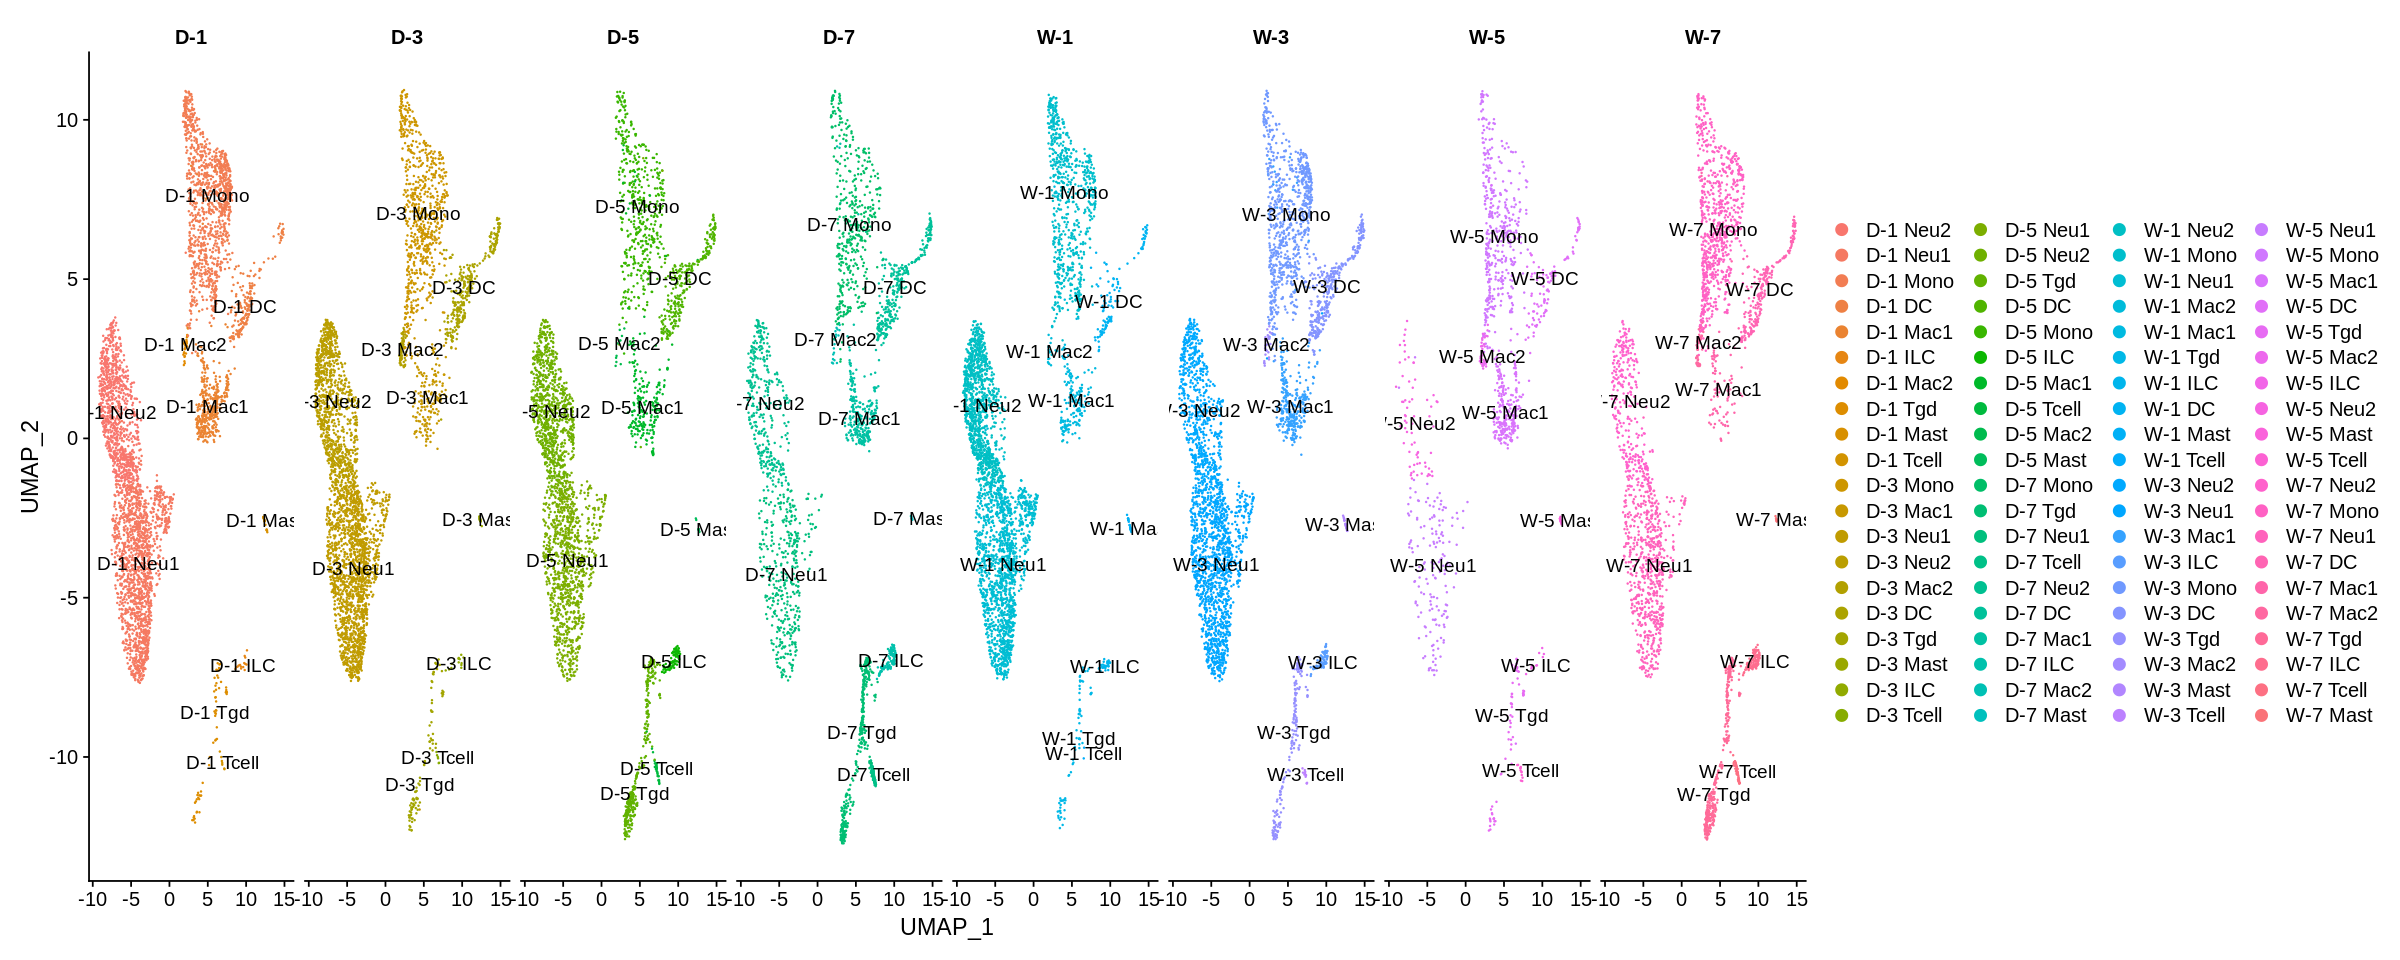

In [50]:
options(repr.plot.width = 20, repr.plot.height = 8)
DimPlot(mice_clustered_data, 
               split.by = "group", 
        label = TRUE)
     

In [43]:
DFU_Mac1_D1_DEGs <- FindMarkers(mice_clustered_data, ident.1 = "D-1 Mac1", ident.2 = "W-1 Mac1", only.pos = TRUE, verbose = FALSE)


In [45]:
output_file <- "/data2/ZenNa/mice_count_data/Result/DFU_Mac1_D1_DEGs.csv"
write.csv(DFU_Mac1_D1_DEGs, file = output_file, row.names = TRUE)     

In [46]:
head(DFU_Mac1_D1_DEGs)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vim,0.0004611926,0.3692904,0.847,0.769,1
Chil3,0.0046313839,0.2937667,0.415,0.277,1
Il1b,0.0069230563,0.5136398,0.648,0.578,1
Foxp1,0.0077182838,1.2254315,0.132,0.058,1
Lyz2,0.0079884646,0.3431242,0.824,0.711,1
Srrm2,0.0094106791,0.9876631,0.168,0.087,1


In [49]:
DFU_Mac1_D1_DEGs$gene <- rownames(DFU_Mac1_D1_DEGs)

In [51]:
head(DFU_Mac1_D1_DEGs)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Vim,0.0004611926,0.3692904,0.847,0.769,1,Vim
Chil3,0.0046313839,0.2937667,0.415,0.277,1,Chil3
Il1b,0.0069230563,0.5136398,0.648,0.578,1,Il1b
Foxp1,0.0077182838,1.2254315,0.132,0.058,1,Foxp1
Lyz2,0.0079884646,0.3431242,0.824,0.711,1,Lyz2
Srrm2,0.0094106791,0.9876631,0.168,0.087,1,Srrm2


In [47]:
library(fgsea)

In [48]:
GO <- fgsea::gmtPathways("/data2/ZenNa/mice_count_data/pathways/m5.go.bp.v2023.1.Mm.symbols.gmt")

In [52]:
fold_changes<- DFU_Mac1_D1_DEGs$avg_log2FC
names(fold_changes) <- DFU_Mac1_D1_DEGs$gene

In [53]:
DFU_Mac1_D1_DEGs_GO <- fgsea(pathways = GO,stats = fold_changes, eps = 0.0, minSize = 15, maxSize = 500)  

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


In [54]:
head(DFU_Mac1_D1_DEGs_GO[order(pval), ])


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
GOBP_CELL_ACTIVATION,0.0001710884,0.04191665,0.5188481,0.5048600,2.059508,41,"Foxp1 , Fgr , Cd83 , H2-Aa , St3gal1, Apoe , Cd86 , Cdkn1a , Tlr2 , Ptprc , Tnf , Il17ra , H2-Ab1 , Tnfsf9 , Sirpb1c, Zmiz1 , Cd74 , Rbpj , Lcp2 , Ptpre , Ccl5 , Cd44 , H2-Eb1 , Il1b , Rabgef1"
GOBP_POSITIVE_REGULATION_OF_LEUKOCYTE_CELL_CELL_ADHESION,0.0019202626,0.13484355,0.4550599,0.5539948,1.955384,20,"Cd83 , H2-Aa , Cd86 , Ptprc , Tnf , H2-Ab1 , Tnfsf9 , Sirpb1c, Zmiz1 , Cd74 , Ccl5 , Cd44 , H2-Eb1 , Il1b"
GOBP_LEUKOCYTE_CELL_CELL_ADHESION,0.0022030730,0.13484355,0.4317077,0.5216144,1.889498,23,"Cd83 , H2-Aa , Cd86 , Wnk1 , Ptprc , Tnf , H2-Ab1 , Tnfsf9 , Sirpb1c, Zmiz1 , Cd74 , Ccl5 , Cd44 , H2-Eb1 , Il1b"
GOBP_POSITIVE_REGULATION_OF_CELL_ACTIVATION,0.0026397073,0.13484355,0.4317077,0.5133805,1.871270,24,"Fgr , Cd83 , H2-Aa , Cd86 , Cdkn1a , Ptprc , Tnf , H2-Ab1 , Tnfsf9 , Sirpb1c, Zmiz1 , Cd74 , Ccl5 , H2-Eb1 , Il1b"
GOBP_REGULATION_OF_T_CELL_ACTIVATION,0.0036146615,0.13484355,0.4317077,0.5391620,1.874887,19,"Cd83 , H2-Aa , Cd86 , Ptprc , H2-Ab1 , Tnfsf9 , Sirpb1c, Zmiz1 , Cd74 , Ccl5 , Cd44 , H2-Eb1 , Il1b"
GOBP_REGULATION_OF_LYMPHOCYTE_ACTIVATION,0.0039893109,0.13484355,0.4070179,0.4995320,1.820792,24,"Fgr , Cd83 , H2-Aa , Cd86 , Cdkn1a , Ptprc , H2-Ab1 , Tnfsf9 , Sirpb1c, Zmiz1 , Cd74 , Ccl5 , Cd44 , H2-Eb1 , Il1b"


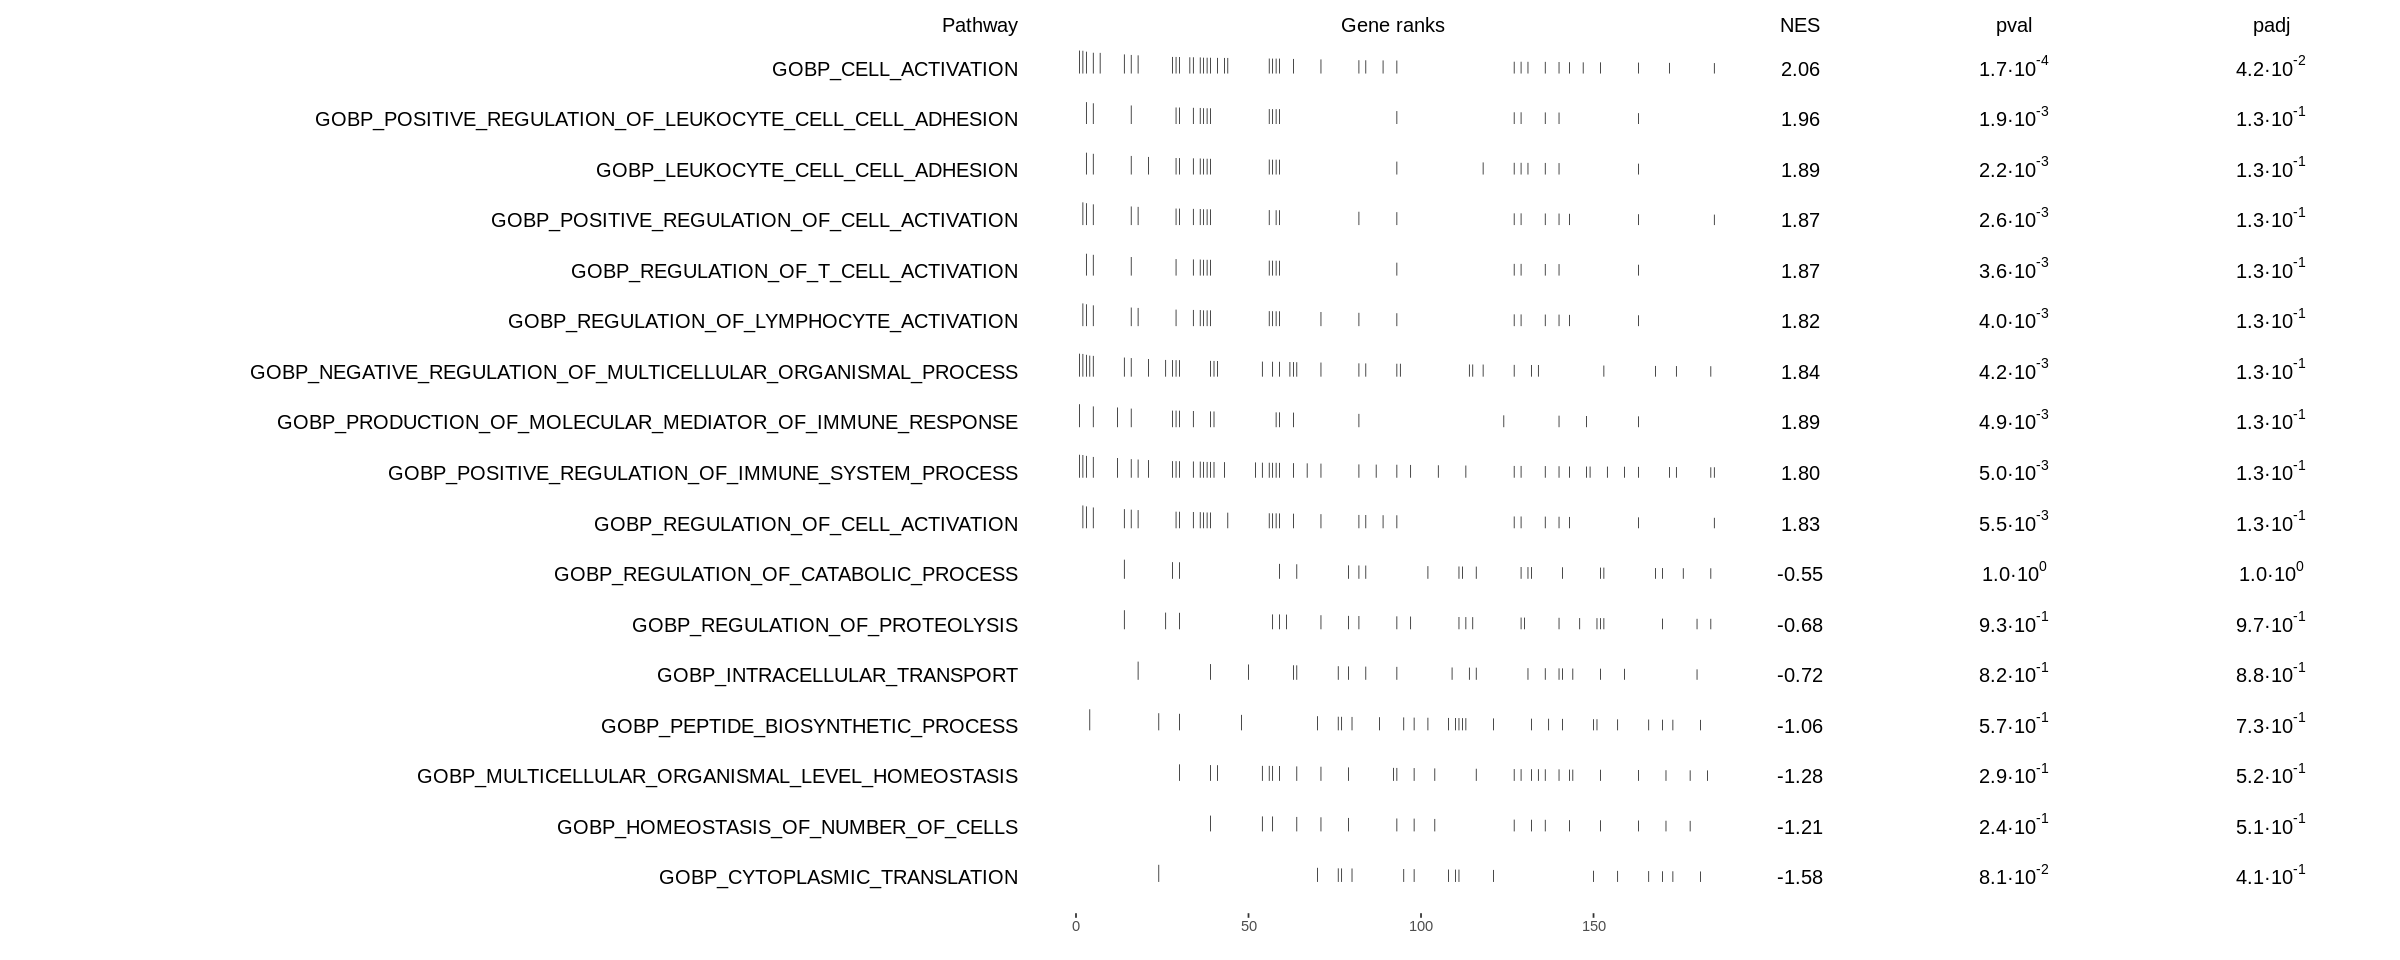

In [55]:
topPathwaysUp <- DFU_Mac1_D1_DEGs_GO[ES > 0][head(order(pval), n=10), pathway]
topPathwaysDown <- DFU_Mac1_D1_DEGs_GO[ES < 0][head(order(pval), n=10),pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
plotGseaTable(GO[topPathways], fold_changes, DFU_Mac1_D1_DEGs_GO, 
              gseaParam=0.5)
